# Module 14 - Portfolio Project - Biodiversity

In this project I am going to inspect two **datasets** on the biodiversity of American national parks.<br>
The two datasets are in the form of CSV files and are provided by the website [*Codecadamy*](https://www.codecademy.com):<br>

<ul>
  <li>species_info.csv: contains data about different species and their conservation status
    <ul>
      <li>category: class of species</li>
      <li>scientific_name: the scientific name of each species</li>
      <li>common_name: the common names of each species</li>
      <li>conservation_status: each species’ current conservation status</li>
    </ul></li>
  <li>observations.csv: holds recorded sightings of different species at several national parks for the past 7 days
    <ul>
      <li>scientific_name: the scientific name of each species</li>
      <li>park_name: park where species were found</li>
      <li>observations: the number of times each species was observed at park</li>
    </ul></li>
</ul>

With the help of data analysis and visualization, I aim to answer the following **research questions**:<br>
1. What is the distribution of conservation_status for protected animals?
2. Which category has the highest proportion of species that are protected?
3. Are the category of a species and whether it is protected or not significantly associated with each other?
4. Which animal and plant species have been observed the most in each park?
5. What can we learn about the bears in the parks?


**Table of contents**:<br>
<ul><li><a href="#Import-necessary-libraries-&-load-the-data">Import necessary libraries & load the data</a></li>
<li><a href="#Exploratory-Data-Analysis">Exploratory Data Analysis</a></li>
    <ul><li><a href="#Inspecting-the-datasets">Inspecting the datasets</a></li>
    <li><a href="#Tidying-and-cleaning-the-datasets">Tidying and cleaning the datasets</a></li></ul>
<li><a href="#Data-analysis-&-visualization">Data analysis & visualization</a></li>
    <ul><li><a href="#Q1-What-is-the-distribution-of-conservation_status-for-protected-animals?">Q1 What is the distribution of conservation_status for protected animals?</a></li>
    <li><a href="#Q2-Which-category-has-the-highest-proportion-of-species-that-are-protected?">Q2 Which category has the highest proportion of species that are protected?</a></li>
    <li><a href="#Q3-Are-the-category-of-a-species-and-whether-it-is-protected-or-not-significantly-associated-with-each-other?">Q3 Are the category of a species and whether it is protected or not significantly associated with each other?</a></li>
    <li><a href="#Q4-Which-animal-and-plant-species-have-been-observed-the-most-in-each-park?">Q4 Which animal and plant species have been observed the most in each park?</a></li>
    <li><a href="#Q5-What-can-we-learn-about-the-bears-in-the-parks?">Q5 What can we learn about the bears in the parks?</a></li></ul>
<li><a href="#Conclusion">Conclusion</a></li></ul>

### Import necessary libraries & load the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
# load the csv files into dataframes
obs = pd.read_csv('observations.csv')
spec = pd.read_csv('species_info.csv')

### Exploratory Data Analysis

#### Inspecting the datasets

#### `observations` dataset

In [3]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


(23296, 3)
Index(['scientific_name', 'park_name', 'observations'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
         scientific_name                            park_name  observations
count              23296                                23296  23296.000000
unique              5541                                    4           NaN
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN
freq                  12                                 5824           NaN
mean                 NaN                                  NaN    142.287904
std                  NaN                                  NaN     69.89

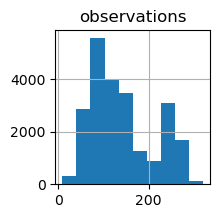

In [4]:
print(obs.shape)
print(obs.columns)
print(obs.info())
print(obs.describe(include='all'))
obs.hist(figsize=(2,2));

- The dataset consists of 23296 rows and 3 columns.
- The names of the columns are: scientific_name, park_name and observations.
- The values of the variables **scientific_name** and **park_name** are objects/strings, and the values of the variable **observations** are integers.
- There seem to be no missing values.
- The variable **scientific_name** has 5541 unique values.
- The variable **park_name** has 4 unique values.
- The variable **observations** has an average of 142, which is not that far from the median, 124. The minimum and the maximum values are 9 and 321, respectively. The data shows a relatively normal distribution.

Let's take a look at the value_counts of the columns.

In [5]:
def valuecounts(dataframe):
    column_names = dataframe.columns
    for item in column_names:
        print(f"The value_counts of the column '{item}':\n")
        print(dataframe[item].value_counts())
        print(f'\n')
    return

In [6]:
valuecounts(obs) # value_counts of the observations dataset

The value_counts of the column 'scientific_name':

Myotis lucifugus                        12
Puma concolor                           12
Hypochaeris radicata                    12
Holcus lanatus                          12
Streptopelia decaocto                   12
                                        ..
Packera dimorphophylla var. paysonii     4
Smilax bona-nox                          4
Chondestes grammacus                     4
Leymus triticoides                       4
Dichanthelium depauperatum               4
Name: scientific_name, Length: 5541, dtype: int64


The value_counts of the column 'park_name':

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64


The value_counts of the column 'observations':

84     220
85     210
91     206
92     203
95     202
      ... 
9        1
321      1
303      1
314      1
310      1
Na

As for the value_counts of **scientific_name**, we can see that the most frequently occurring species occur 12 times in the dataset. This could mean, for example, that the same species has been observed in 4 different national parks on 3 different days, or that it has been observed in 2 different national parks on 6 different days, etc.<br>
<br>
There are four different national parks in **park_name**: Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, Yellowstone National Park. Each park appears exactly the same amount of times in the dataset (5824 times).<br>
<br>
In the case of **observations** we can see that the observation 84 occurs 220 times in the dataset, being the most frequently occurring number of observations.

#### `species_info` dataset

In [7]:
spec.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [8]:
print(spec.shape)
print(spec.columns)
print(spec.info())
print(spec.describe(include='all'))

(5824, 4)
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq   

- The dataset consists of 5824 rows and 4 columns.
- The names of the columns are: category, scientific_name, common_names, conservation_status.
- The values of all the variables are objects/strings.
- There is a large number of missing values in the case of **conservation_status**.
- The variables **category**, **scientific_name**, **common_names** do not seem to have any missing values.
- The variable **category** has 7 unique values.
- The variable **scientific_name** has 5541 unique values. The most frequently occurring value is *Castor canadensis* appearing 3 times in the dataset.
- The variable **common_name** has 5504 unique values.
- The variable **conservation_status** has 4 unique values.

Let's take a look at the value_counts of the columns.

In [9]:
valuecounts(spec) # value_counts of the species_info dataset

The value_counts of the column 'category':

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


The value_counts of the column 'scientific_name':

Castor canadensis            3
Canis lupus                  3
Hypochaeris radicata         3
Columba livia                3
Puma concolor                3
                            ..
Carex                        1
Hexastylis shuttleworthii    1
Hexastylis heterophylla      1
Hexastylis arifolia          1
Tribulus terrestris          1
Name: scientific_name, Length: 5541, dtype: int64


The value_counts of the column 'common_names':

Brachythecium Moss                                                            7
Dicranum Moss                                                                 7
Panic Grass                                                                   6
Bryum Moss 

As for the value_counts of **category**, there are 7 different values; *Vascular Plant*, *Bird*, *Nonvascular Plant*, *Mammal*, *Fish*, *Amphibian*, *Reptile*. The most frequently occurring one is *Vascular plant* (4470) and the least frequently occurring one is *Reptile* (79).<br>
<br>
The value_counts of **scientific_name** show that the most frequently occurring ones appear 3 times in the dataset. I wonder why a scientific name would occur multiple times in the dataset and why it does not appear only once.<br>
<br>
The **common_names** with the highest frequency appear 7-6 times in the dataset. This would mean that multiple scientific names would have the same common names.<br>
<br>
In the case of **conservation_status**, there are 4 different values; *Species of Concern*, *Endangered*, *Threatened*, *In Recovery*. The most frequently occurrring status is *Species of Concern* (161) and the least frequently occurring one is *In Recovery* (4).<br>

#### Tidying and cleaning the datasets

First, let's have a look at duplicates.

In [10]:
duplicates_obs=obs.duplicated()
print(f'The number of duplicate rows of the observations dataset:\n{duplicates_obs.value_counts()}\n')

duplicates_spec=spec.duplicated()
print(f'The number of duplicate rows of the species_info dataset:\n{duplicates_spec.value_counts()}\n')

The number of duplicate rows of the observations dataset:
False    23281
True        15
dtype: int64

The number of duplicate rows of the species_info dataset:
False    5824
dtype: int64



There are 15 duplicate rows in the case of the `observations` dataset which is not necessarily a problem since it is possibe to observe the same species in the same national park the same amount of times in the course of seven days. Therefore, I will not delete these duplicate rows.<br>
There are no duplicate rows in the case of the `species_info` dataset.

In the next steps, I am going to explore why a scientific name appears multiple times in the dataset `species_info`. Let's take a closer look at some of the frequently occurring scientific names, e.g. *Castor canadensis*, *Canis lupus*.

In [11]:
print(spec.loc[spec['scientific_name']=='Castor canadensis'])

     category    scientific_name             common_names conservation_status
49     Mammal  Castor canadensis  American Beaver, Beaver                 NaN
3050   Mammal  Castor canadensis          American Beaver                 NaN
4475   Mammal  Castor canadensis                   Beaver                 NaN


In [12]:
print(spec.loc[spec['scientific_name']=='Canis lupus'])

     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery
4448   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered


From the above rows, we can see that the reason why a scientific name occurs multiple times is because common names have been entered in different ways and there can also be different conservation statuses of a species.<br>
I am going to create a new dataframe (spec_sub) in which I keep rows with only one version of common names and lose the rest. I am going to preserve the original dataframe (spec) as well, in case I need more information.

In [13]:
# create a new dataframe, keep only one version of common names
# look at the subset of scientific_name and conservation_status and drop duplicate rows
spec_sub=spec.drop_duplicates(subset=['scientific_name', 'conservation_status'], ignore_index=True)
print(spec_sub.scientific_name.value_counts().head(10))

Oncorhynchus mykiss                2
Canis lupus                        2
Clethrionomys gapperi gapperi      1
Valeriana dioica var. sylvatica    1
Gaultheria humifusa                1
Arctostaphylos uva-ursi            1
Equisetum variegatum               1
Equisetum scirpoides               1
Equisetum laevigatum               1
Equisetum fluviatile               1
Name: scientific_name, dtype: int64


In [14]:
# there are only 2 scientific names that appear more than once
# the reason for this is the difference in conservation_status
print(spec_sub.loc[spec_sub['scientific_name']=='Oncorhynchus mykiss'])
print(spec_sub.loc[spec_sub['scientific_name']=='Canis lupus'])

     category      scientific_name   common_names conservation_status
560      Fish  Oncorhynchus mykiss  Rainbow Trout                 NaN
3247     Fish  Oncorhynchus mykiss  Rainbow Trout          Threatened
     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3018   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery


I am going to drop the row of *Oncorhynchus mykiss* with no conservation status and the row of *Canis lupus* with the conservation status *In Recovery*.

In [15]:
spec_sub=spec_sub.drop([560, 3018]) # drop two rows of indices 560 and 3018

In [16]:
# make the values of scientific_name, category, common_name and conservation_status lower case for the ease of further processing
spec_sub['scientific_name']=spec_sub['scientific_name'].str.lower()
spec_sub['category']=spec_sub['category'].str.lower()
spec_sub['common_names']=spec_sub['common_names'].str.lower()
spec_sub['conservation_status']=spec_sub['conservation_status'].str.lower()

According to the value_counts of **conservation_status**, there are four main statuses: *species of concern*, *endangered*, *threatened* and *in recovery*. This variable has a large number of null values. Based on the context (and on some Google search), we could interpret these null values as *species not of concern*.<br>
Therefore, I am going to fill these null values with the value *species not of concern*.

In [17]:
spec_sub['conservation_status'].fillna('species not of concern', inplace=True)
spec_sub.head()

,category,scientific_name,common_names,conservation_status
0,mammal,clethrionomys gapperi gapperi,gapper's red-backed vole,species not of concern
1,mammal,bos bison,"american bison, bison",species not of concern
2,mammal,bos taurus,"aurochs, aurochs, domestic cattle (feral), dom...",species not of concern
3,mammal,ovis aries,"domestic sheep, mouflon, red sheep, sheep (feral)",species not of concern
4,mammal,cervus elaphus,wapiti or elk,species not of concern


In [18]:
# shorten the name of the national parks in park_name of the obs dataframe
repl={'Great Smoky Mountains National Park': 'Great Smoky Mountains', 'Yosemite National Park': 'Yosemite', 'Bryce National Park': 'Bryce', 'Yellowstone National Park': 'Yellowstone',}
obs = obs.replace({'park_name': repl})
# make the values of scientific_name and park_name lower case for the ease of further processing
obs['scientific_name']=obs['scientific_name'].str.lower()
obs['park_name']=obs['park_name'].str.lower()
obs.head()

,scientific_name,park_name,observations
0,vicia benghalensis,great smoky mountains,68
1,neovison vison,great smoky mountains,77
2,prunus subcordata,yosemite,138
3,abutilon theophrasti,bryce,84
4,githopsis specularioides,great smoky mountains,85


Now, let's move on to further analysis.

### Data analysis & visualization

#### Q1 What is the distribution of conservation_status for protected animals?

In [19]:
spec_sub['conservation_status'].value_counts()

species not of concern    5362
species of concern         151
endangered                  15
threatened                  10
in recovery                  3
Name: conservation_status, dtype: int64

In [20]:
spec_sub.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

category,amphibian,bird,fish,mammal,nonvascular plant,reptile,vascular plant
conservation_status,,,,,,,
endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
in recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN
species not of concern,72.0,413.0,114.0,146.0,328.0,73.0,4216.0
species of concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


As we can see, there is an extremely high number of species (5362) which are not protected (*species not of concern*).<br>
<br>
In this section, I am only going to look at the animals (the categories of *amphibian*, *bird*, *fish*, *mammal*, *reptile*) and only at the ones that are protected (with the status of *species of concern*, *endangered*, *threatened*, *in recovery*).

In [21]:
conservation_category = spec_sub[(spec_sub['conservation_status'] != 'species not of concern')&(spec_sub['category'] != 'vascular plant')&(spec_sub['category'] != 'nonvascular plant')].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
conservation_category

category,amphibian,bird,fish,mammal,reptile
conservation_status,,,,,
endangered,1.0,4.0,3.0,6.0,NaN
in recovery,NaN,3.0,NaN,NaN,NaN
species of concern,4.0,68.0,4.0,22.0,5.0
threatened,2.0,NaN,4.0,2.0,NaN


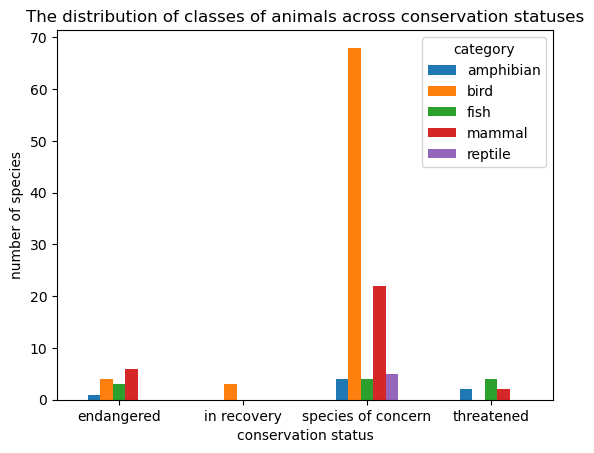

In [22]:
# visualize the distribution of categories of animals across conservation statuses
conservation_category.plot.bar()
plt.title('The distribution of classes of animals across conservation statuses')
plt.xlabel('conservation status')
plt.xticks(rotation=0)
plt.ylabel('number of species');

In [23]:
spec_sub['conservation_status'].loc[(spec_sub['conservation_status'] != 'species not of concern')&(spec_sub['category']!='vascular plant')&(spec_sub['category']!='nonvascular plant')].value_counts()

species of concern    103
endangered             14
threatened              8
in recovery             3
Name: conservation_status, dtype: int64

The most common conservation status for protected animals is *species of concern* with 103 species. The majority of species in this category is made up of birds (68 species) and mammals (22 species). There are a low number of amphibians, fishes and reptiles in this category with 4, 4 and 5 species, respectively.<br>

While the highest number of birds are species of concern (68), there are a few species that are endangered (4) and in recovery (3).<br>
As for mammals, there are 6 endangered and 2 threatened species.<br>
The only conservation status reptiles have is species of concern. <br>
As for fishes and amphibians, there are a low number of species of concern, threatened and endangered species.<br>

In the case of each animal class, the highest number of species are species of concern and there are only a few species of each class that are endangered, threatened or in recovery.

#### Q2 Which category has the highest proportion of species that are protected?

In [24]:
# create a new column 'protected'
# which evaluates to True if the conservation status is 'species of concern', 'endangered', 'threatened' or 'in recovery'
# and False if the status is 'species not of concern'
spec_sub['protected']=spec_sub['conservation_status'] != 'species not of concern'
spec_sub.head()

,category,scientific_name,common_names,conservation_status,protected
0,mammal,clethrionomys gapperi gapperi,gapper's red-backed vole,species not of concern,False
1,mammal,bos bison,"american bison, bison",species not of concern,False
2,mammal,bos taurus,"aurochs, aurochs, domestic cattle (feral), dom...",species not of concern,False
3,mammal,ovis aries,"domestic sheep, mouflon, red sheep, sheep (feral)",species not of concern,False
4,mammal,cervus elaphus,wapiti or elk,species not of concern,False


In [25]:
# calculate how many species are protected and not protected in each category
protected_category=spec_sub.groupby(['category', 'protected'])['scientific_name'].count().unstack().reset_index(level=[0]).rename_axis(columns=None)
# rename the columns
protected_category=protected_category.rename(columns={False: 'not_protected', True: 'protected'})

# calculate the percentage of protected species for each category
protected_category['percentage_protected'] = round((protected_category['protected'] * 100 / (protected_category['not_protected'] + protected_category['protected'])), 2)
protected_category

,category,not_protected,protected,percentage_protected
0,amphibian,72,7,8.86
1,bird,413,75,15.37
2,fish,114,11,8.80
3,mammal,146,30,17.05
4,nonvascular plant,328,5,1.50
5,reptile,73,5,6.41
6,vascular plant,4216,46,1.08


The categories of mammals and birds have the highest proportion of protected species with 17.05% and 15.37%, respectively.<br>
Nonvascular and vascular plants have the lowest proportion of protected species with 1.50% and 1.08%, respectively.<br>
In the case of amphibians, fish and reptiles, 8.86%, 8.80% and 6.41% of their species are protected, respectively.<br>
The percentage of protected species is higher in the case of animals than in the case of plants, with mammals and birds having the highest percentage.

#### Q3 Are the category of a species and whether it is protected or not significantly associated with each other?

The variables **category** and **protected** are both categorical variables.<br>
In order to measure the association between categorical variables, we can use the chi-squared test.<br>
The chi-squared test is based on the comparison of observed and expected frequencies.

First, I am going to formulate a null and an alternate hypothesis. Then, based on the chi-squared test I am going to decide whether to keep or reject the null hypothesis. <br>

**H0 - Null hypothesis**: There is no association between the two variables. They are independent variables.<br>
**H1 - Alternate hypothesis**: There is a significant association between the two variables. They are dependent variables.

First, let's take a look at the contingency matrix of the observed frequencies of the variables **category** and **protected**.

In [26]:
# contingency matrix with observed frequencies
obs_freq=pd.crosstab(spec_sub['category'], spec_sub['protected'])
obs_freq

protected,False,True
category,,
amphibian,72,7
bird,413,75
fish,114,11
mammal,146,30
nonvascular plant,328,5
reptile,73,5
vascular plant,4216,46


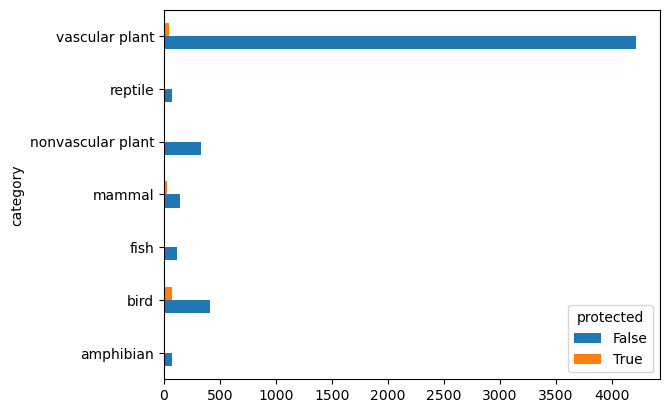

In [27]:
# visualize the variables 'category' and 'protected' in the form of horizontal bar plots
ax=obs_freq.plot.barh()
ax;

Now, let's run the chi-squared statistical test.

In [28]:
threshold=0.05
chi2, pval, dof, expected = chi2_contingency(obs_freq)
print(f"The p-value is: {pval}")
if pval <= threshold:
    print('Dependent variables (reject H0)')
else:
    print('Independent variables (keep H0)')

The p-value is: 5.146759135430123e-89
Dependent variables (reject H0)


The resulting p-value is smaller than the threshold 0.05, which means that we need to reject the Null Hypothesis H0 and accept the Alternative Hypothesis H1.<br>
According to H1, there is a significant association between the two variables. They are dependent variables.<br>
More specifically, the variables **category** and **protected** are dependent, there is a statistically significant association between them. In other words, there is a strong relationship between what kind of category a species belongs to and whether it is protected or not. 

#### Q4 Which animal and plant species have been observed the most in each park?

In [29]:
# left merge the obs dataframe with spec_sub on the column 'scientific_name'
df=pd.merge(obs, spec_sub, on='scientific_name', how='left')
# see whether the left merge has been successful, whether the resulting and the obs dataframes have the same number of rows
df.shape[0]==obs.shape[0]

True

In [30]:
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,protected
0,vicia benghalensis,great smoky mountains,68,vascular plant,"purple vetch, reddish tufted vetch",species not of concern,False
1,neovison vison,great smoky mountains,77,mammal,american mink,species not of concern,False
2,prunus subcordata,yosemite,138,vascular plant,klamath plum,species not of concern,False
3,abutilon theophrasti,bryce,84,vascular plant,velvetleaf,species not of concern,False
4,githopsis specularioides,great smoky mountains,85,vascular plant,common bluecup,species not of concern,False


In [31]:
# create a dataframe for plants
plants=df.loc[df['category'].str.contains('plant')].reset_index()
# create a dataframe for animals
animals=df.loc[df['category'].str.contains('plant')==False].reset_index()

In [32]:
# find out how many times a plant species has been observed in each park during the course of seven days
plants_observed_per_park=plants.groupby(['scientific_name', 'park_name'])['observations'].sum().reset_index()

# find out which plant species has been observed the most in each park during the course of seven days
idx = plants_observed_per_park.groupby('park_name')['observations'].idxmax()
max_observations_per_park = plants_observed_per_park.loc[idx]
max_observations_per_park

,scientific_name,park_name,observations
1856,avena sativa,bryce,303
7281,fragaria virginiana,great smoky mountains,217
8306,holcus lanatus,yellowstone,805
8687,hypochaeris radicata,yosemite,505


In [33]:
# let's take a look at the details of these plant species
spec_sub.loc[(spec_sub['scientific_name']=='avena sativa')|
            (spec_sub['scientific_name']=='fragaria virginiana')|
            (spec_sub['scientific_name']=='holcus lanatus')|
            (spec_sub['scientific_name']=='hypochaeris radicata')]

,category,scientific_name,common_names,conservation_status,protected
858,vascular plant,hypochaeris radicata,"cat's ear, spotted cat's-ear",species not of concern,False
2154,vascular plant,avena sativa,"cultivated oat, oats",species not of concern,False
2242,vascular plant,holcus lanatus,"common velvet grass, velvetgrass",species not of concern,False
2493,vascular plant,fragaria virginiana,"virginia strawberry, wild strawberry",species not of concern,False


In [34]:
# find out how many times an animal species has been observed in each park during the course of seven days
animals_observed_per_park=animals.groupby(['scientific_name', 'park_name'])['observations'].sum().reset_index()

# find out which animal species has been observed the most in each park during the course of seven days
idx = animals_observed_per_park.groupby('park_name')['observations'].idxmax()
max_observations_per_park = animals_observed_per_park.loc[idx]
max_observations_per_park

,scientific_name,park_name,observations
804,columba livia,bryce,339
3357,streptopelia decaocto,great smoky mountains,256
3358,streptopelia decaocto,yellowstone,771
579,castor canadensis,yosemite,501


In [35]:
spec_sub.loc[(spec_sub['scientific_name']=='columba livia')|
            (spec_sub['scientific_name']=='streptopelia decaocto')|
            (spec_sub['scientific_name']=='castor canadensis')]

,category,scientific_name,common_names,conservation_status,protected
49,mammal,castor canadensis,"american beaver, beaver",species not of concern,False
156,bird,columba livia,rock dove,species not of concern,False
3060,bird,streptopelia decaocto,eurasian collared-dove,species not of concern,False


The **plant species** observed the highest number of times:<br>

- in the Bryce National Park is the *avena sativa*, a type of oat, observed 303 times,
- in the Great Smoky Mountains National Park is the *fragaria virginiana*, a type of strawberry, observed 217 times,
- in the Yellowstone National Park is the *holcus lanatus*, a type of velvetgrass, observed 805 times, and
- in the Yosemite National Park is the *hypochaeris radicata*, a type of cat's ear, observed 505 times.<br>

All these plant species belong to the category *vascular plant*, and none of them are protected.<br>

The **animal species** observed the highest number of times:<br>

- in the Bryce National Park is the *columbia livia*, a type of dove, observed 339 times,
- in the Great Smoky Mountains National Park is the *streptopelia decaocto*, another type of dove, observed 256 times,
- in the Yellowstone National Park is also the *streptopelia decaocto*, a type of dove, observed 771 times, and
- in the Yosemite National Park is the *castor canadensis*, a type of beaver, observed 501 times.<br>

In the Great Smoky National Park and the Yellowstone National Park the animal species observed the most times is the same (the *streptopelia decaocto*, a type of dove).<br> 

None of these animal species are protected.<br>

#### Q5 What can we learn about the bears in the parks?

I am simply curious about the situation of bears and would like to learn more about them from the datasets.

In [36]:
# create a dataframe for bears
bears=df.loc[(df['common_names'].str.contains('bear')) & (df['category']=='mammal')].reset_index()
bears.head()

,index,scientific_name,park_name,observations,category,common_names,conservation_status,protected
0,3412,ursus arctos,yosemite,130,mammal,"brown bear, grizzly bear",species not of concern,False
1,4299,ursus arctos,bryce,73,mammal,"brown bear, grizzly bear",species not of concern,False
2,8750,ursus arctos horribilis,bryce,38,mammal,grizzly bear,threatened,True
3,8832,ursus americanus,yosemite,162,mammal,black bear,species not of concern,False
4,8946,ursus arctos,yellowstone,232,mammal,"brown bear, grizzly bear",species not of concern,False


In [37]:
# how many different bear species are there?
print(bears['scientific_name'].nunique())
# what bear species are there?
print(bears['scientific_name'].unique())
# what are the common names of these bears?
print(bears['common_names'].unique())

3
['ursus arctos' 'ursus arctos horribilis' 'ursus americanus']
['brown bear, grizzly bear' 'grizzly bear' 'black bear']


In [38]:
# rename the value 'brown bear, grizzly bear' to 'brown bear'
bears=bears.replace(to_replace='brown bear, grizzly bear', value='brown bear')

In [39]:
# let us take a look at the details of these bear species
spec_sub.loc[spec_sub['scientific_name'].str.contains('ursus')]

,category,scientific_name,common_names,conservation_status,protected
27,mammal,ursus americanus,black bear,species not of concern,False
3025,mammal,ursus arctos horribilis,grizzly bear,threatened,True
4274,mammal,ursus arctos,"brown bear, grizzly bear",species not of concern,False


There has been three species of bears observed in the four national parks during the course of seven days.<br>
The three species are *ursus arctos*, *ursus arctos horribilis*, *ursus americanus*, also known as brown bear, grizzly bear and black bear, respectively. Whereas the grizzly bear's conservation status is *threatened*, therefore it is protected, the brown bear and the black bear are not protected.

How many times has each type of bear been observed altogether in all the four national parks during the course of seven days?

In [40]:
bears_obs=bears.groupby(['common_names'])['observations'].sum().reset_index()
bears_obs

,common_names,observations
0,black bear,1132
1,brown bear,539
2,grizzly bear,276


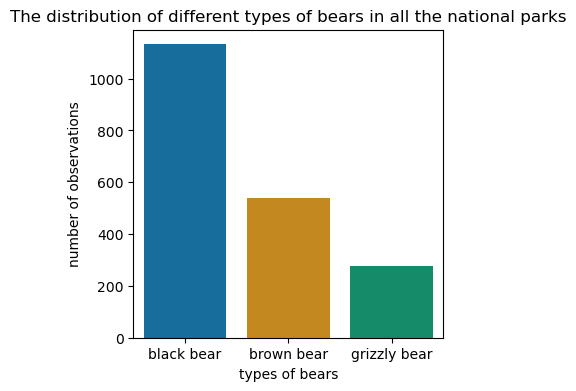

In [41]:
# visualize results in the form of bar charts
plt.figure(figsize=(4,4))
fig=sns.barplot(data=bears_obs, x='common_names', y='observations', palette='colorblind')
fig.set_xticklabels(labels=bears_obs['common_names'].unique())
plt.xlabel('types of bears')
plt.ylabel('number of observations')
plt.title('The distribution of different types of bears in all the national parks');

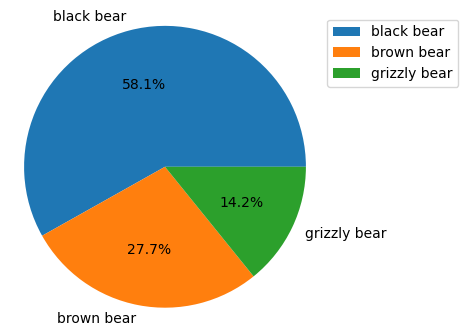

In [42]:
# visualize results in the form of a pie chart
# as there are only 3 types of bears (3 slices of pie), the visualization of data as a pie chart would not lead to confusion
plt.figure(figsize=(4,4))
plt.pie(bears_obs['observations'], labels=bears_obs['common_names'], autopct='%0.1f%%')
plt.axis('equal')
plt.legend(bears_obs['common_names'],  bbox_to_anchor=(1,1), loc='upper left');

Over the course of seven days, black bears have been observed the most frequently in the four national parks altogether (1132 observations, which  is 58.1% of the observations of all bears). The second most frequently observed bear type is the brown bear (539 observations, which is 27.7%) and the third one is the grizzly bear (276 observations, which is 14.2%).

In which parks do different types of bears appear the most, and the least?

In [43]:
# find out how many times each type of bear has been observed in each park in the course of seven days
bears_parks=bears.groupby(['common_names', 'park_name'])['observations'].sum().reset_index()
# bears_parks

In [44]:
idx = bears_parks.groupby(['common_names'])['observations'].idxmax()
max_scores = bears_parks.loc[idx]
max_scores

,common_names,park_name,observations
2,black bear,yellowstone,473
6,brown bear,yellowstone,232
10,grizzly bear,yellowstone,115


In [45]:
idx = bears_parks.groupby(['common_names'])['observations'].idxmin()
min_scores = bears_parks.loc[idx]
min_scores

,common_names,park_name,observations
1,black bear,great smoky mountains,122
4,brown bear,bryce,73
8,grizzly bear,bryce,38


All the three types of bears have been observed the highest number of times in the *Yellowstone National Park*.
Black bears have been observed the lowest number of times in the *Great Smoky Mountains National Park*, and the brown bear and the grizzly bear in the *Bryce National Park*.<br>

### Conclusion

In this project I examined two datasets. One contained data on different animal and plant species, the other one contained data on the number of observations of different animal and plant species in four different national parks over the course of seven days.<br>

After I inspected, tidied and cleaned the datasets, I carried out data analyses and visualizations focusing on five main research questions.<br>

I summarize the main findings below:<br>

**Q1** What is the distribution of conservation_status for protected animals?<br>
- The most common conservation status among protected animals is *species of concern* with mainly birds and mammals.<br>

**Q2** Which category has the highest proportion of species that are protected?<br>
- The categories of mammals and birds have the highest proportion of protected species.<br>

**Q3** Are the category of a species and whether it is protected or not significantly associated with each other?<br>
- There is a strong relationship between what kind of category a species belong to and whether it is protected or not. The variables **category** and **protected** are dependent variables and are significantly associated with each other. <br>

**Q4** Which animal and plant species have been observed the most in each park?<br>
- The plant species that has been observed the most in the Bryce National Park is the *avena sativa*, a type of oat, in the Great Smoky Mountains National Park is the *fragaria virginiana*, a type of strawberry, in the Yellowstone National Park is the *holcus lanatus*, a type of velvetgrass, and in the Yosemite National Park is the *hypochaeris radicata*, a type of cat's ear.<br>
- The animal species that has been observed the most in the Bryce National Park is the *columbia livia*, a type of dove, in the Great Smoky Mountains National Park and in the Yellowstone National Park is the *streptopelia decaocto*, another type of dove, and in the Yosemite National Park is the *castor canadensis*, a type of beaver.<br>

**Q5** What can we learn about the bears in the parks?<br>
- There have been three species of bears observed; *ursus arctos*, *ursus arctos horribilis*, and *ursus americanus*, also known as brown bear, grizzly bear and black bear, respectively. While the grizzly bear is protected, the brown bear and the black bear are not.
- During the seven days, black bears have been observed the highest number of times, then brown bears, and finally grizzly bears the least number of times.
- All three types of bears have been observed the most in the Yellowstone National Park. Black bears have been observed the least in the Great Smoky Mountains National Park, and brown bears and grizzly bears in the Bryce National Park.<br>